<h1>FIFA 23 ML Project</h1>

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

<h2>Data Preprocessing:</h2>

In [4]:
data = pd.read_csv("../input/fifa-23-complete-player-dataset/players_fifa23.csv")
data.head()

,ID,Name,FullName,Age,Height,Weight,PhotoUrl,Nationality,Overall,Potential,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,158023,L. Messi,Lionel Messi,35,169,67,https://cdn.sofifa.net/players/158/023/23_60.png,Argentina,91,91,...,91,88,91,67,66,67,62,53,62,22
1,165153,K. Benzema,Karim Benzema,34,185,81,https://cdn.sofifa.net/players/165/153/23_60.png,France,91,91,...,89,84,89,67,67,67,63,58,63,21
2,188545,R. Lewandowski,Robert Lewandowski,33,185,81,https://cdn.sofifa.net/players/188/545/23_60.png,Poland,91,91,...,86,83,86,67,69,67,64,63,64,22
3,192985,K. De Bruyne,Kevin De Bruyne,31,181,70,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,91,91,...,91,91,91,82,82,82,78,72,78,24
4,231747,K. Mbappé,Kylian Mbappé,23,182,73,https://cdn.sofifa.net/players/231/747/23_60.png,France,91,95,...,92,84,92,70,66,70,66,57,66,21


In [5]:
data.shape

(18539, 90)

In [6]:
needed_columns = ['Name', 'Age', 'Height', 'Weight',
       'Overall', 'Potential', 'Growth', 'TotalStats',
       'BaseStats', 'BestPosition', 'Club', 'ValueEUR', 'WageEUR',
       'ReleaseClause', 'ContractUntil', 'ClubJoined', 'OnLoad',
       'PreferredFoot', 'IntReputation', 'WeakFoot',
       'SkillMoves', 'AttackingWorkRate', 'DefensiveWorkRate', 'PaceTotal',
       'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal',
       'PhysicalityTotal', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'STRating', 'LWRating', 'LFRating', 'CFRating', 'RFRating', 'RWRating',
       'CAMRating', 'LMRating', 'CMRating', 'RMRating', 'LWBRating',
       'CDMRating', 'RWBRating', 'LBRating', 'CBRating', 'RBRating',
       'GKRating']

data = data[needed_columns]

<h3>Handle the missing values:</h3>

In [7]:
for i in data.columns:
    if data[i].isnull().sum() > 0:
        print(i, " ", data[i].isnull().sum())

ContractUntil   92


<h4>ContractUntil Column:</h4>

In [8]:
print("The percentage of the null values is: ", (data["ContractUntil"].isnull().sum()/data.shape[0])*100, "%")

The percentage of the null values is:  0.49625114623226707 %


As the percentage of nulls is small so we can drop the values of nulls in that column.

In [9]:
data.drop(data[data["ContractUntil"].isnull()].index, axis = 0, inplace =True)

In [10]:
data["ContractUntil"].isnull().sum()

0

<h3>Handle The Categorical Columns:</h3>

In [11]:
for i in data.columns:
    if data[i].dtype == 'object':
        print(i)

Name
BestPosition
Club
PreferredFoot
AttackingWorkRate
DefensiveWorkRate


In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data["PreferredFoot"] = le.fit_transform(data["PreferredFoot"])
data["AttackingWorkRate"] = le.fit_transform(data["AttackingWorkRate"])
data["DefensiveWorkRate"] = le.fit_transform(data["DefensiveWorkRate"])
data["Club"] = le.fit_transform(data["Club"])


In [13]:
mapping = {'CAM': 0, 'CF': 1, 'ST': 2, 'CM': 3, 'RW': 4, 'GK': 5, 'CB': 6, 'LW': 7, 'CDM': 8, 'LM': 9, 'LB': 10,
            'RM': 11, 'RB': 12, 'LWB': 13, 'RWB': 14}

data = data.replace({'BestPosition': mapping})

In [14]:
X = data.drop(["Name", "BestPosition"], axis = 1)
Y = pd.DataFrame(data["BestPosition"])

<h3>Handle the Imbalanced Data:</h3>

<AxesSubplot:xlabel='BestPosition', ylabel='count'>

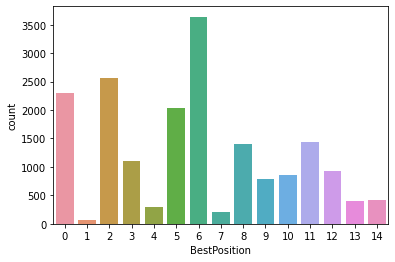

In [15]:
sns.countplot(x="BestPosition", data = Y)

In [16]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)
X, Y = sm.fit_resample(X, Y)

In [17]:
print(f' X_shape: {X.shape} \n y_shape: {Y.shape}')

 X_shape: (54600, 78) 
 y_shape: (54600, 1)


<AxesSubplot:xlabel='BestPosition', ylabel='count'>

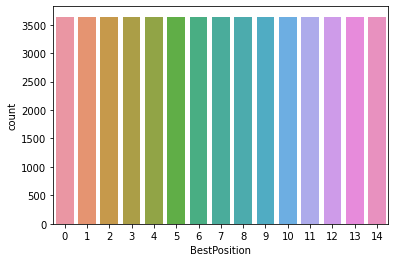

In [18]:
sns.countplot(x="BestPosition", data = Y)

<h3>Feature Scaling:</h3>

In [19]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

X = mms.fit_transform(X)

<h3>Perform Dimentionality Reduction:</h3>

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 39) # Reduce the Dimention of the Data to its half
X = pd.DataFrame(pca.fit_transform(X))

<h3>Split the Data to Train and Test sets:</h3>

In [21]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.20, random_state=42)

<h2>Modeling</h2>

<h3>A. Predict the Position of the Player Using 8 Classification Algorithms:</h3>

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# Function to check the classification report
def classification_report_fun(model_name, actual, predicted):
    print(f'The Classification Report for {model_name} Classifier:')
    print(classification_report(actual, predicted))

<h3>1. Logistic Regression:</h3>

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [24]:
lr.fit(X_Train , Y_Train)

LogisticRegression()

In [25]:
lr.score(X_Train, Y_Train)

0.7730769230769231

In [26]:
lr.score(X_Test, Y_Test)

0.7746336996336997

In [27]:
Y_Pred_lr = lr.predict(X_Test)

In [28]:
accuracy_score(Y_Test, Y_Pred_lr)

0.7746336996336997

In [29]:
classification_report_fun("Logistic Regression", Y_Test, Y_Pred_lr)

The Classification Report for Logistic Regression Classifier:
              precision    recall  f1-score   support

           0       0.82      0.71      0.76       704
           1       0.85      0.96      0.90       740
           2       0.95      0.90      0.92       692
           3       0.83      0.92      0.87       700
           4       0.55      0.53      0.54       720
           5       1.00      1.00      1.00       764
           6       0.96      0.92      0.94       721
           7       0.57      0.58      0.57       755
           8       0.89      0.90      0.90       727
           9       0.68      0.65      0.67       745
          10       0.72      0.73      0.72       745
          11       0.73      0.69      0.71       734
          12       0.68      0.67      0.68       701
          13       0.70      0.73      0.72       730
          14       0.70      0.72      0.71       742

    accuracy                           0.77     10920
   macro avg      

<h3>2. Random Forest:</h3>

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini',n_estimators=100)

In [31]:
rf.fit(X_Train, Y_Train)

RandomForestClassifier()

In [32]:
rf.score(X_Train, Y_Train)

1.0

In [33]:
rf.score(X_Test, Y_Test)

0.911996336996337

In [34]:
Y_Pred_rf = rf.predict(X_Test)

In [35]:
classification_report_fun("Random Forest", Y_Test, Y_Pred_rf)

The Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.88      0.68      0.77       704
           1       0.98      1.00      0.99       740
           2       0.95      0.93      0.94       692
           3       0.83      0.93      0.88       700
           4       0.90      0.97      0.93       720
           5       1.00      1.00      1.00       764
           6       0.95      0.88      0.92       721
           7       0.95      0.98      0.96       755
           8       0.88      0.90      0.89       727
           9       0.85      0.88      0.86       745
          10       0.91      0.92      0.91       745
          11       0.85      0.77      0.81       734
          12       0.90      0.92      0.91       701
          13       0.92      0.96      0.94       730
          14       0.93      0.96      0.94       742

    accuracy                           0.91     10920
   macro avg       0.91 

<h3>3. XGB:</h3>

In [36]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

In [37]:
xgb.fit(X_Train, Y_Train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [38]:
xgb.score(X_Train, Y_Train)

0.9999084249084249

In [39]:
xgb.score(X_Test, Y_Test)

0.9217948717948717

In [40]:
Y_Pred_xgb = xgb.predict(X_Test)

In [41]:
classification_report_fun("XGB", Y_Test, Y_Pred_xgb)

The Classification Report for XGB Classifier:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       704
           1       0.99      1.00      0.99       740
           2       0.98      0.93      0.96       692
           3       0.88      0.94      0.91       700
           4       0.90      0.97      0.93       720
           5       1.00      1.00      1.00       764
           6       0.97      0.91      0.94       721
           7       0.93      0.97      0.95       755
           8       0.91      0.93      0.92       727
           9       0.87      0.86      0.87       745
          10       0.93      0.91      0.92       745
          11       0.85      0.81      0.83       734
          12       0.90      0.90      0.90       701
          13       0.92      0.97      0.95       730
          14       0.91      0.94      0.93       742

    accuracy                           0.92     10920
   macro avg       0.92      0.92 

<h3>4. Decision Tree:</h3>

In [42]:
from sklearn.tree  import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_features = 39,max_depth = 12)

In [43]:
dt.fit(X_Train, Y_Train)

DecisionTreeClassifier(max_depth=12, max_features=39)

In [44]:
dt.score(X_Train, Y_Train)

0.7513278388278388

In [45]:
dt.score(X_Test, Y_Test)

0.6685897435897435

In [46]:
Y_Pred_dt = dt.predict(X_Test)

In [47]:
classification_report_fun("Decision Tree", Y_Test, Y_Pred_dt)

The Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.53      0.41      0.46       704
           1       0.84      0.88      0.86       740
           2       0.84      0.73      0.78       692
           3       0.66      0.66      0.66       700
           4       0.53      0.62      0.57       720
           5       1.00      1.00      1.00       764
           6       0.87      0.80      0.83       721
           7       0.60      0.65      0.63       755
           8       0.68      0.69      0.68       727
           9       0.59      0.55      0.57       745
          10       0.63      0.58      0.61       745
          11       0.52      0.49      0.50       734
          12       0.57      0.54      0.55       701
          13       0.61      0.74      0.67       730
          14       0.58      0.67      0.62       742

    accuracy                           0.67     10920
   macro avg       0.67 

<h3>5. Adaboost:</h3>

In [48]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()

In [49]:
ada.fit(X_Train, Y_Train)

AdaBoostClassifier()

In [50]:
ada.score(X_Train, Y_Train)

0.13340201465201465

In [51]:
ada.score(X_Test, Y_Test)

0.13333333333333333

In [52]:
Y_Pred_ada = dt.predict(X_Test)

In [53]:
classification_report_fun("Adaboost", Y_Test, Y_Pred_ada)

The Classification Report for Adaboost Classifier:
              precision    recall  f1-score   support

           0       0.53      0.41      0.46       704
           1       0.84      0.88      0.86       740
           2       0.84      0.73      0.78       692
           3       0.66      0.66      0.66       700
           4       0.53      0.62      0.57       720
           5       1.00      1.00      1.00       764
           6       0.87      0.80      0.83       721
           7       0.60      0.65      0.63       755
           8       0.68      0.69      0.68       727
           9       0.59      0.55      0.57       745
          10       0.63      0.58      0.61       745
          11       0.52      0.49      0.50       734
          12       0.57      0.54      0.55       701
          13       0.61      0.74      0.67       730
          14       0.58      0.67      0.62       742

    accuracy                           0.67     10920
   macro avg       0.67      

<h3>6. light GBM:</h3>

In [54]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(max_depth = 15)

In [55]:
lgbm.fit(X_Train, Y_Train)

LGBMClassifier(max_depth=15)

In [56]:
lgbm.score(X_Train, Y_Train)

0.9981684981684982

In [57]:
lgbm.score(X_Test, Y_Test)

0.9092490842490842

In [58]:
Y_Pred_lgbm = lgbm.predict(X_Test)

In [59]:
classification_report_fun("light GBM", Y_Test, Y_Pred_lgbm)

The Classification Report for light GBM Classifier:
              precision    recall  f1-score   support

           0       0.87      0.75      0.81       704
           1       0.98      1.00      0.99       740
           2       0.97      0.94      0.95       692
           3       0.87      0.93      0.90       700
           4       0.87      0.95      0.91       720
           5       1.00      1.00      1.00       764
           6       0.96      0.91      0.93       721
           7       0.92      0.96      0.94       755
           8       0.90      0.91      0.91       727
           9       0.84      0.84      0.84       745
          10       0.92      0.90      0.91       745
          11       0.85      0.79      0.82       734
          12       0.89      0.86      0.88       701
          13       0.91      0.95      0.93       730
          14       0.88      0.94      0.91       742

    accuracy                           0.91     10920
   macro avg       0.91     

<h3>7. CatBoost:</h3>

In [60]:
from catboost import CatBoostClassifier

cb = CatBoostClassifier(max_depth = 15, iterations=10, learning_rate=0.3)

In [61]:
cb.fit(X_Train, Y_Train)

0:	learn: 2.2410858	total: 42.2s	remaining: 6m 20s
1:	learn: 1.8986437	total: 1m 23s	remaining: 5m 32s
2:	learn: 1.5986604	total: 2m 4s	remaining: 4m 49s
3:	learn: 1.4285170	total: 2m 45s	remaining: 4m 8s
4:	learn: 1.2843661	total: 3m 28s	remaining: 3m 28s
5:	learn: 1.1587061	total: 4m 10s	remaining: 2m 47s
6:	learn: 1.0516472	total: 4m 53s	remaining: 2m 5s
7:	learn: 0.9459847	total: 5m 35s	remaining: 1m 23s
8:	learn: 0.8742211	total: 6m 16s	remaining: 41.8s
9:	learn: 0.8115190	total: 6m 58s	remaining: 0us


In [62]:
cb.score(X_Train, Y_Train)

0.8917811355311356

In [63]:
cb.score(X_Test, Y_Test)

0.7772893772893773

In [64]:
Y_Pred_cb = cb.predict(X_Test)

In [65]:
classification_report_fun("CatBoost", Y_Test, Y_Pred_cb)

The Classification Report for CatBoost Classifier:
              precision    recall  f1-score   support

           0       0.73      0.49      0.59       704
           1       0.86      0.97      0.91       740
           2       0.89      0.83      0.86       692
           3       0.75      0.76      0.75       700
           4       0.71      0.77      0.74       720
           5       1.00      1.00      1.00       764
           6       0.92      0.82      0.87       721
           7       0.76      0.80      0.78       755
           8       0.73      0.75      0.74       727
           9       0.70      0.68      0.69       745
          10       0.75      0.78      0.77       745
          11       0.64      0.59      0.61       734
          12       0.74      0.75      0.74       701
          13       0.76      0.83      0.79       730
          14       0.71      0.80      0.76       742

    accuracy                           0.78     10920
   macro avg       0.78      

<h3>8. KNN:</h3>

In [66]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 8)

In [67]:
knn.fit(X_Train, Y_Train)

KNeighborsClassifier(n_neighbors=8)

In [68]:
knn.score(X_Train, Y_Train)

0.8527014652014652

In [69]:
knn.score(X_Test, Y_Test)

0.8050366300366301

In [70]:
Y_Pred_knn = cb.predict(X_Test)

In [71]:
classification_report_fun("KNN", Y_Test, Y_Pred_knn)

The Classification Report for KNN Classifier:
              precision    recall  f1-score   support

           0       0.73      0.49      0.59       704
           1       0.86      0.97      0.91       740
           2       0.89      0.83      0.86       692
           3       0.75      0.76      0.75       700
           4       0.71      0.77      0.74       720
           5       1.00      1.00      1.00       764
           6       0.92      0.82      0.87       721
           7       0.76      0.80      0.78       755
           8       0.73      0.75      0.74       727
           9       0.70      0.68      0.69       745
          10       0.75      0.78      0.77       745
          11       0.64      0.59      0.61       734
          12       0.74      0.75      0.74       701
          13       0.76      0.83      0.79       730
          14       0.71      0.80      0.76       742

    accuracy                           0.78     10920
   macro avg       0.78      0.78 

<h3>B. Group the Players in Clusters Based on their Similarities Using 4 Clustering Algorithms:</h3>

<h3>Extracting players with overall above 86:</h3>

In [72]:
X_clus = data[data.Overall > 86] 
X_clus.shape

(43, 80)

In [73]:
names = X_clus["Name"].tolist() # saving names for later

X_clus = X_clus.drop(['Name'], axis = 1)

#Feature Scaling
X_clus = mms.fit_transform(X_clus)

<h3>Perform Dimentionality Reduction:</h3>

In [74]:
pca = PCA(n_components = 2) # Reduce the Dimention of the Data to its half
X_clus = pd.DataFrame(pca.fit_transform(X_clus))

<h2>Clustering:</h2>

<h3>1. KMeans:</h3>

<h4>Use the Elbow function to determine the optimal number of Clusters:</h4>

In [75]:
import random
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score

visualizer = KElbowVisualizer(KMeans(), timings=False)

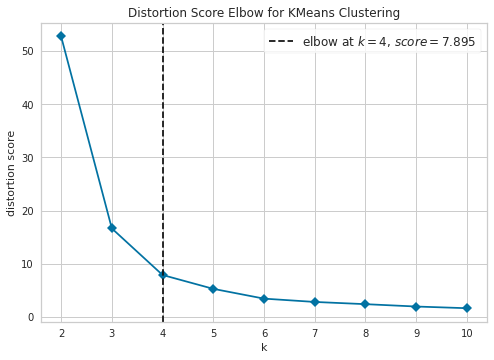

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [76]:
visualizer.fit(X_clus)
visualizer.show()

<h4>So the Optimal number of clusters is 4</h4>

In [77]:
kmeans = KMeans(n_clusters=4)

kmeans = kmeans.fit(X_clus)

# get the cluster labels
labels = kmeans.predict(X_clus)

# cluster values
kmeans_clusters = kmeans.labels_.tolist()

In [78]:
X_kmeans = X_clus.copy()
X_kmeans['cluster'] = kmeans_clusters
X_kmeans['name'] = names
X_kmeans.columns = ['x', 'y', 'cluster', 'name']
X_kmeans.head()

,x,y,cluster,name
0,-1.454918,-1.884138,3,L. Messi
1,-1.197165,-1.394994,3,K. Benzema
2,-1.339649,-1.340175,3,R. Lewandowski
3,-1.926870,-0.572596,1,K. De Bruyne
4,-1.546036,-1.581132,3,K. Mbappé


<h3>Plot the Clusters of the K-means Algorithm:</h3>

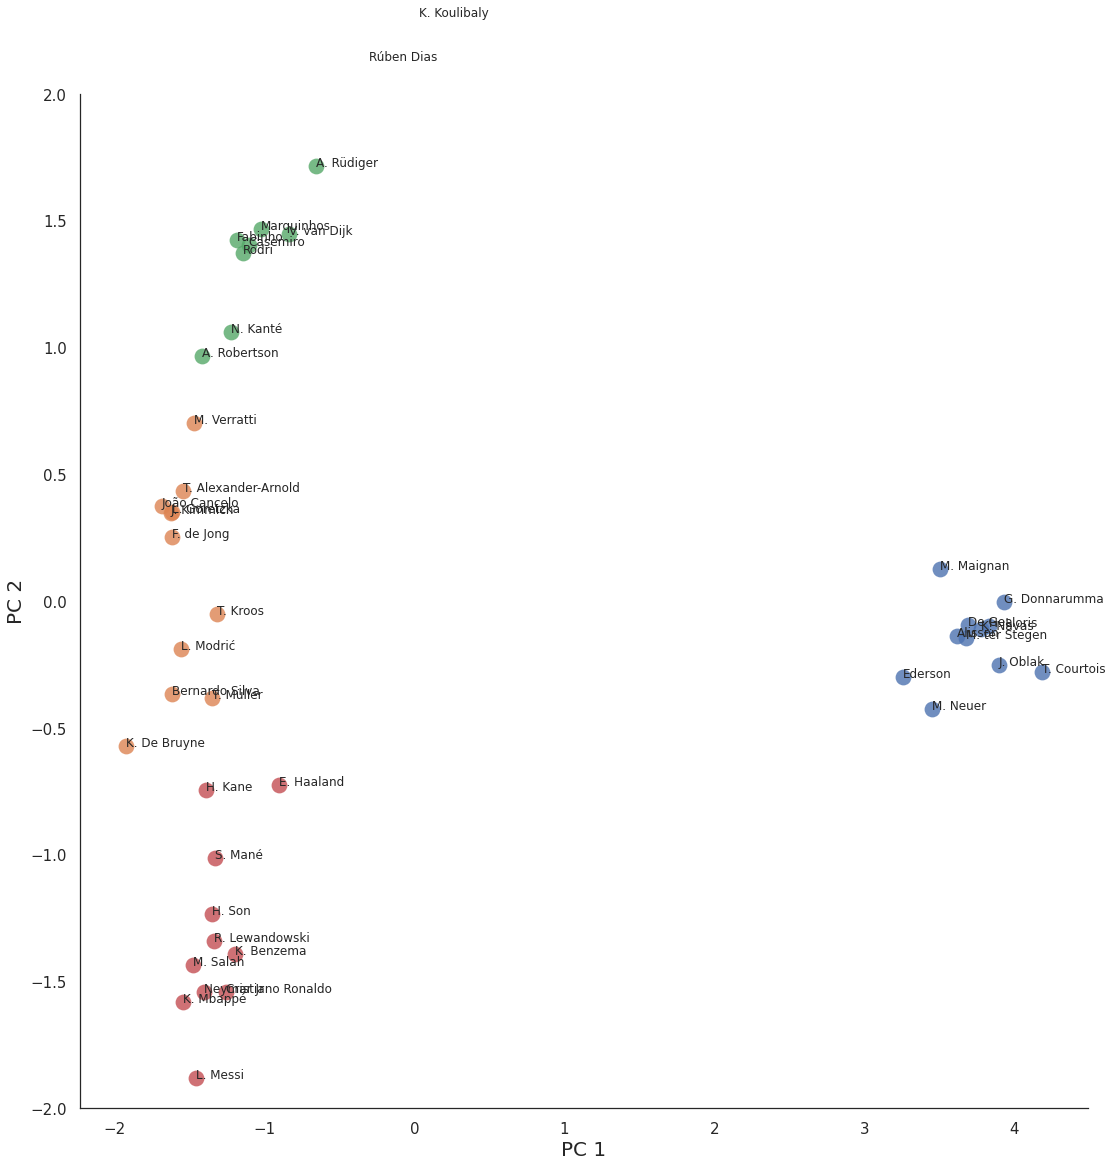

In [79]:
sns.set(style="white")

ax = sns.lmplot(x="x", y="y", hue='cluster', data = X_kmeans, legend=False,
                   fit_reg=False, height = 15, scatter_kws={"s": 250})

texts = []
for x, y, s in zip(X_kmeans.x, X_kmeans.y, X_kmeans.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()

<h3>Evaluate the K-means algorithm using Silhouette coefficient:</h3>

The Silhouette Coefficient for a set of samples is given as the mean of the Silhouette Coefficient for each sample. The score is bounded between <b>-1 for incorrect clustering and +1 for highly dense clustering</b>. </br>
Scores around zero indicate overlapping clusters. The score is higher when clusters are dense and well separated.

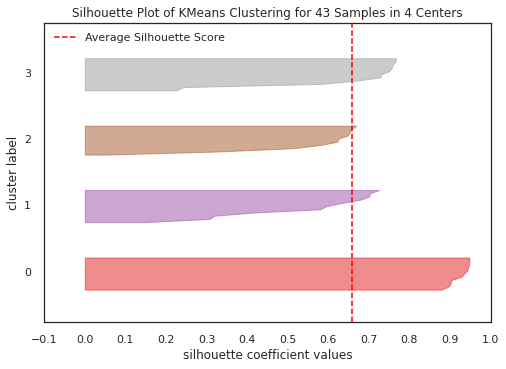

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 43 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [80]:
sil_visualizer = SilhouetteVisualizer(kmeans)
sil_visualizer.fit(X_clus)    
sil_visualizer.show()

In [81]:
silhouette_score(X_clus, kmeans.labels_)

0.6586684841017966

<h3>2. Hirerichal Clustering:</h3>

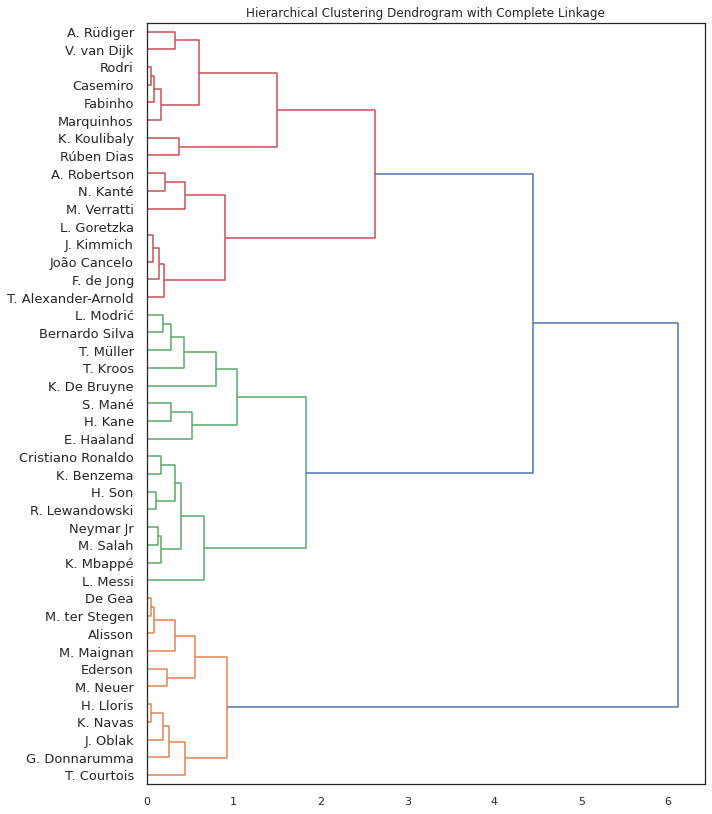

In [82]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# plot dendrogram using complete linkage
plt.figure(figsize=(10,14))
plt.title('Hierarchical Clustering Dendrogram with Complete Linkage')

dendrogram = sch.dendrogram(sch.linkage(X_clus, method="complete"), labels= names, leaf_font_size = 13, orientation='right')

In [83]:
unique_colors = set(dendrogram['color_list'])
num_clusters_hir = len(unique_colors)-1
print("Optimal number of clusters is : ", num_clusters_hir)

Optimal number of clusters is :  3


In [84]:
from sklearn.cluster import AgglomerativeClustering
cluster_hir = AgglomerativeClustering(n_clusters=num_clusters_hir, affinity='euclidean', linkage='ward')
cluster_hir.fit_predict(X_clus)

# cluster values
hir_clusters = cluster_hir.labels_.tolist()

In [85]:
print("Estimated number of noise points:", list(cluster_hir.labels_).count(-1))

Estimated number of noise points: 0


In [86]:
X_hir = X_clus.copy()
X_hir['cluster'] = hir_clusters
X_hir['name'] = names
X_hir.columns = ['x', 'y', 'cluster', 'name']
X_hir.head()

,x,y,cluster,name
0,-1.454918,-1.884138,2,L. Messi
1,-1.197165,-1.394994,2,K. Benzema
2,-1.339649,-1.340175,2,R. Lewandowski
3,-1.926870,-0.572596,2,K. De Bruyne
4,-1.546036,-1.581132,2,K. Mbappé


<h3>Plot the Clusters of the Hirerichal Clustering Algorithm:</h3>

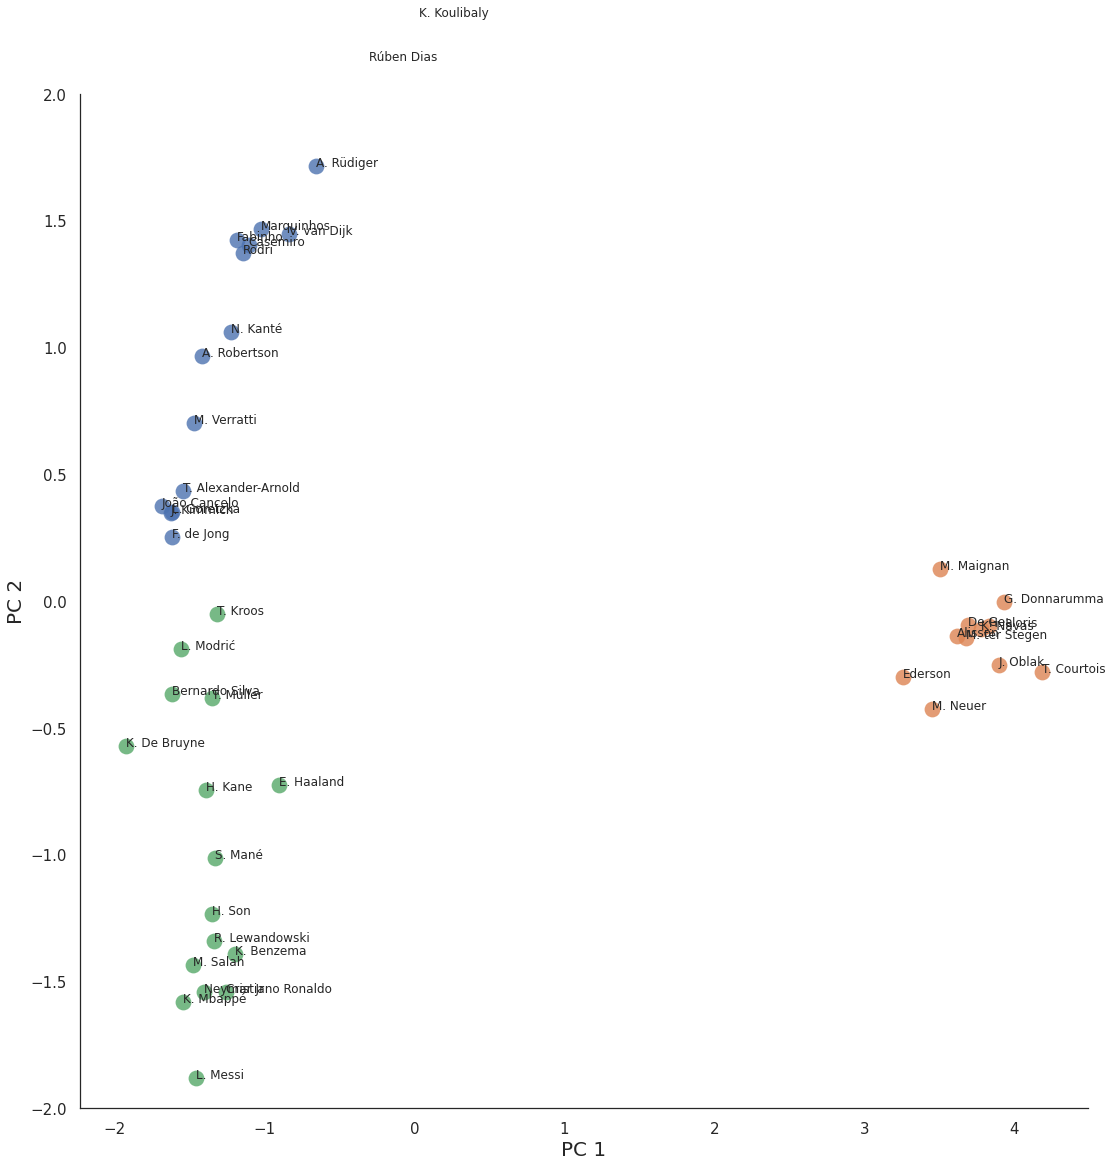

In [87]:
sns.set(style="white")

ax = sns.lmplot(x="x", y="y", hue='cluster', data = X_hir, legend=False,
                   fit_reg=False, height = 15, scatter_kws={"s": 250})

texts = []
for x, y, s in zip(X_hir.x, X_hir.y, X_hir.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()

<h3>Evaluate the Hirerichal Clustring algorithm using Silhouette coefficient:</h3>

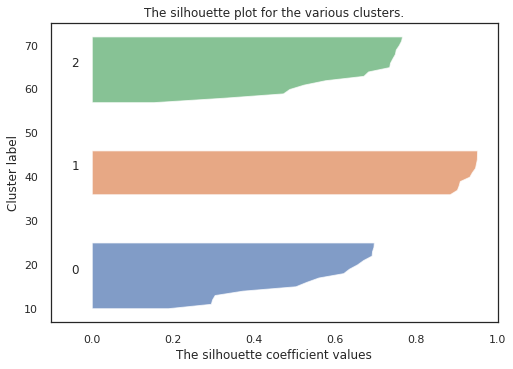

In [88]:
cluster_labels = cluster_hir.labels_
silhouette_avg = silhouette_score(X_clus, cluster_hir.labels_)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X_clus, cluster_labels)

fig, ax1 = plt.subplots(1)

# The 1st subplot is the silhouette plot
ax1.set_xlim([-0.1, 1])


y_lower = 10
for i in range(num_clusters_hir):
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                     alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")


plt.show()

In [89]:
silhouette_score(X_clus, cluster_hir.labels_)

0.6617483192694013

<h3>3. Density-based clustering (DBSCAN):</h3>

In [90]:
from sklearn.cluster import DBSCAN

# train the model using DBSCAN
db = DBSCAN(eps=0.429, min_samples=5)
db.fit_predict(X_clus)

# prediction for dbscan clusters
db_clusters = db.labels_.tolist()

In [91]:
print("Number of Cluster in the Density Based Clustering:", len(set(db_clusters)))

Number of Cluster in the Density Based Clustering: 6


In [92]:
X_db = X_clus.copy()
X_db['cluster'] = db_clusters
X_db['name'] = names
X_db.columns = ['x', 'y', 'cluster', 'name']
X_db.head()

,x,y,cluster,name
0,-1.454918,-1.884138,0,L. Messi
1,-1.197165,-1.394994,0,K. Benzema
2,-1.339649,-1.340175,0,R. Lewandowski
3,-1.926870,-0.572596,-1,K. De Bruyne
4,-1.546036,-1.581132,0,K. Mbappé


<h3>Plot the Clusters of the DBSCAN Clustering Algorithm:</h3>

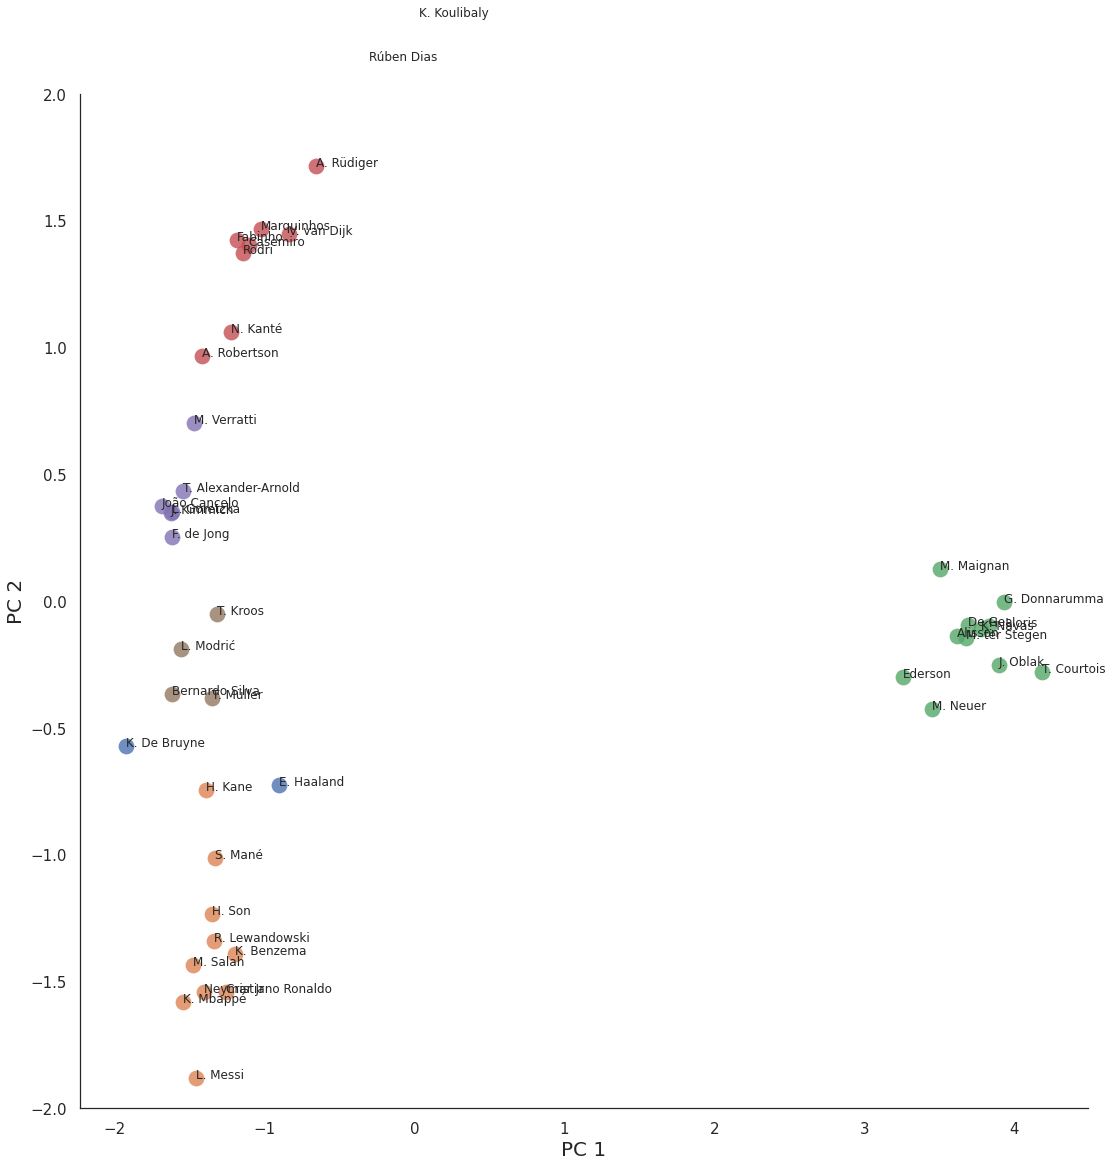

In [93]:
sns.set(style="white")

ax = sns.lmplot(x="x", y="y", hue='cluster', data = X_db, legend=False,
                   fit_reg=False, height = 15, scatter_kws={"s": 250})

texts = []
for x, y, s in zip(X_db.x, X_db.y, X_db.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()

<h3>Evaluate the DBSCAN Clustring algorithm using Silhouette coefficient:</h3>

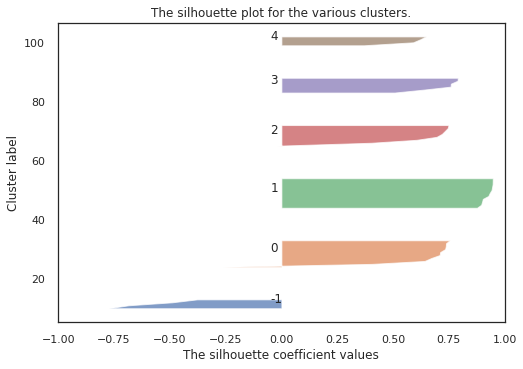

In [94]:
cluster_labels = db.labels_
silhouette_avg = silhouette_score(X_clus, db.labels_)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X_clus, cluster_labels)
fig, ax1 = plt.subplots(1)

# The 1st subplot is the silhouette plot
ax1.set_xlim([-1, 1])

num_clusters = len(set(db_clusters))
y_lower = 10
for i in range(-1, num_clusters-1):
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                     alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

plt.show()

In [95]:
silhouette_score(X_clus, db.labels_)

0.5760147964369781

<h3>4. Distribution-based clustering:</h3>

In [96]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4)
gmm.fit(X_clus)

gmm_clusters = gmm.predict(X_clus).tolist()

In [97]:
X_gmm = X_clus.copy()
X_gmm['cluster'] = gmm_clusters
X_gmm['name'] = names
X_gmm.columns = ['x', 'y', 'cluster', 'name']
X_gmm.head()

,x,y,cluster,name
0,-1.454918,-1.884138,3,L. Messi
1,-1.197165,-1.394994,3,K. Benzema
2,-1.339649,-1.340175,3,R. Lewandowski
3,-1.926870,-0.572596,0,K. De Bruyne
4,-1.546036,-1.581132,3,K. Mbappé


<h3>Plot the Clusters of the Distribution-based Clustering Algorithm:</h3>

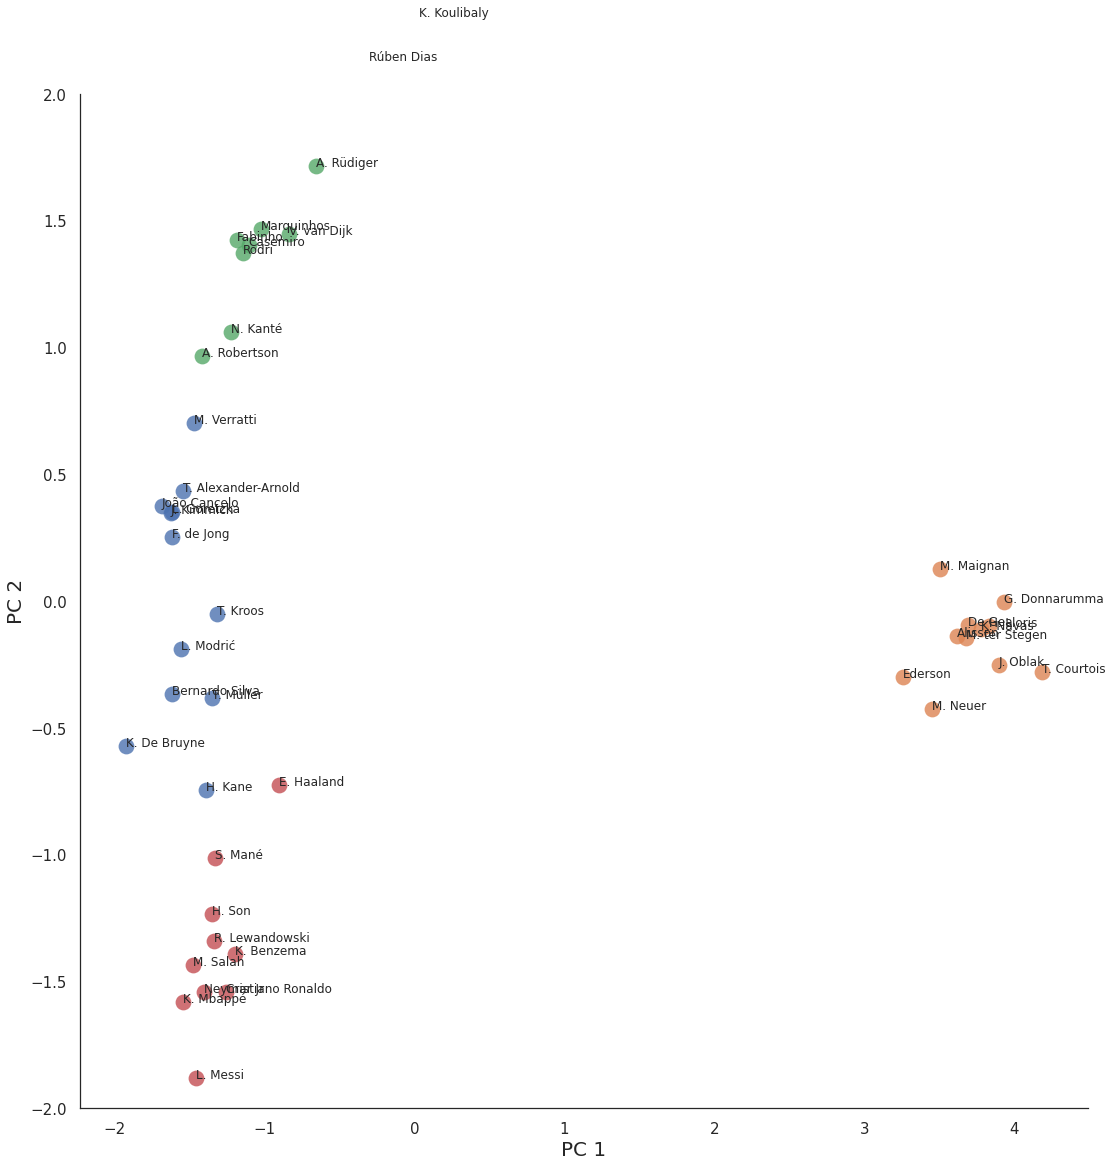

In [98]:
sns.set(style="white")

ax = sns.lmplot(x="x", y="y", hue='cluster', data = X_gmm, legend=False,
                   fit_reg=False, height = 15, scatter_kws={"s": 250})

texts = []
for x, y, s in zip(X_gmm.x, X_gmm.y, X_gmm.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()

<h3>Evaluate the Distribution-based Clustring algorithm using Silhouette coefficient:</h3>

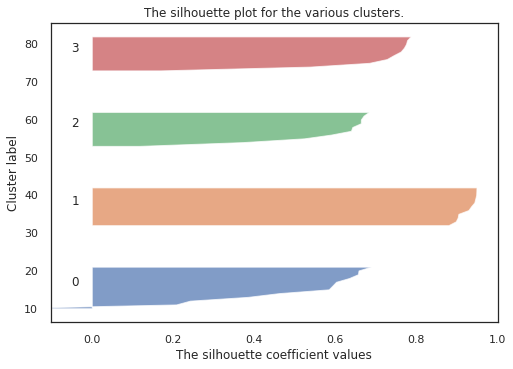

In [99]:
cluster_labels = np.array(gmm_clusters)
silhouette_avg = silhouette_score(X_clus, cluster_labels)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X_clus, cluster_labels)
fig, ax1 = plt.subplots(1)

# The 1st subplot is the silhouette plot
ax1.set_xlim([-0.1, 1])

num_clusters = len(set(gmm_clusters))
y_lower = 10
for i in range(num_clusters):
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                     alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

plt.show()

In [100]:
silhouette_score(X_clus, cluster_labels)

0.6499688092298105